In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import plotly.express as px

In [23]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [25]:
data = pd.read_csv("/content/drive/MyDrive/Colabnot/survey_lung_cancer.csv")
data.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,0,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,0,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,1,59,1,1,1,2,1,2,1,2,1,2,2,1,2,2
3,0,63,2,2,2,1,1,1,1,1,2,1,1,2,2,2
4,1,63,1,2,1,1,1,1,1,2,1,2,2,1,1,2


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55394 entries, 0 to 55393
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   GENDER                 55394 non-null  int64
 1   AGE                    55394 non-null  int64
 2   SMOKING                55394 non-null  int64
 3   YELLOW_FINGERS         55394 non-null  int64
 4   ANXIETY                55394 non-null  int64
 5   PEER_PRESSURE          55394 non-null  int64
 6   CHRONIC DISEASE        55394 non-null  int64
 7   FATIGUE                55394 non-null  int64
 8   ALLERGY                55394 non-null  int64
 9   WHEEZING               55394 non-null  int64
 10  ALCOHOL CONSUMING      55394 non-null  int64
 11  COUGHING               55394 non-null  int64
 12  SHORTNESS OF BREATH    55394 non-null  int64
 13  SWALLOWING DIFFICULTY  55394 non-null  int64
 14  CHEST PAIN             55394 non-null  int64
 15  LUNG_CANCER            55394 non-nul

In [27]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
GENDER,55394.0,0.502004,0.500000,0.0,0.0,1.0,1.0,1.0
AGE,55394.0,44.137614,15.309217,18.0,31.0,44.0,57.0,87.0
SMOKING,55394.0,1.499531,0.500004,1.0,1.0,1.0,2.0,2.0
YELLOW_FINGERS,55394.0,1.496299,0.499991,1.0,1.0,1.0,2.0,2.0
ANXIETY,55394.0,1.500614,0.500004,1.0,1.0,2.0,2.0,2.0
PEER_PRESSURE,55394.0,1.496769,0.499994,1.0,1.0,1.0,2.0,2.0
CHRONIC DISEASE,55394.0,1.501047,0.500003,1.0,1.0,2.0,2.0,2.0
FATIGUE,55394.0,1.497924,0.500000,1.0,1.0,1.0,2.0,2.0
ALLERGY,55394.0,1.501914,0.500001,1.0,1.0,2.0,2.0,2.0
WHEEZING,55394.0,1.501065,0.500003,1.0,1.0,2.0,2.0,2.0


In [28]:
data.isna().sum() # boş değer yok 

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

In [29]:
data.dtypes

GENDER                   int64
AGE                      int64
SMOKING                  int64
YELLOW_FINGERS           int64
ANXIETY                  int64
PEER_PRESSURE            int64
CHRONIC DISEASE          int64
FATIGUE                  int64
ALLERGY                  int64
WHEEZING                 int64
ALCOHOL CONSUMING        int64
COUGHING                 int64
SHORTNESS OF BREATH      int64
SWALLOWING DIFFICULTY    int64
CHEST PAIN               int64
LUNG_CANCER              int64
dtype: object

In [ ]:
data["LUNG_CANCER"].unique()

In [ ]:
data["GENDER"].unique()

array([0, 1])

In [ ]:
"""data['GENDER'] = data['GENDER'].map({'F': 0, 'M': 1})

data['LUNG_CANCER'] = data['LUNG_CANCER'].map({'NO': 0, 'YES': 1})"""

In [30]:
# X data
X = data.drop("LUNG_CANCER", axis=1) #kanser kolonunu çıkarttık
X.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
0,0,69,1,2,2,1,1,2,1,2,2,2,2,2,2
1,0,74,2,1,1,1,2,2,2,1,1,1,2,2,2
2,1,59,1,1,1,2,1,2,1,2,1,2,2,1,2
3,0,63,2,2,2,1,1,1,1,1,2,1,1,2,2
4,1,63,1,2,1,1,1,1,1,2,1,2,2,1,1


In [31]:
# y data
y = data["LUNG_CANCER"]
y.head()

0    1
1    1
2    2
3    2
4    2
Name: LUNG_CANCER, dtype: int64

In [32]:
# Veriler dengesiz olduğu için verilere rastgele örnekler ekleme

from imblearn.over_sampling import RandomOverSampler

over_samp =  RandomOverSampler(random_state=0)
X_train_res, y_train_res = over_samp.fit_resample(X, y)
X_train_res.shape, y_train_res.shape

((55826, 15), (55826,))

Verileri test ve train olarak ayırdık

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train_res, y_train_res, test_size = 0.2, random_state = 42)

In [34]:
len(X_train), len(X_test)

(44660, 11166)

In [35]:
# Scaling the data 
# Verileri ölçekleme

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

* Linear Regression

In [36]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [38]:
LinearRegressionScore = lr.score(X_test,y_test)
print("Accuracy obtained by Linear Regression model:",LinearRegressionScore*100)

Accuracy obtained by Linear Regression model: -0.0007291458773268644


* Random Forest Classifier


In [39]:
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)
rfc = RandomForestClassifier(n_estimators=100, max_depth = 3, random_state=42)
rfc.fit(X_train,y_train)


RandomForestClassifier(max_depth=3, random_state=42)

In [40]:
RandomForestClassifierScore = rfc.score(X_test, y_test)
print("Accuracy obtained by Random Forest Classifier model:",RandomForestClassifierScore*100)

Accuracy obtained by Random Forest Classifier model: 49.81647511883988


* K Neighbors Classifier

In [42]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)


KNeighborsClassifier()

In [43]:
KNeighborsClassifierScore = knn.score(X_test, y_test)
print("Accuracy obtained by K Neighbors Classifier model:",KNeighborsClassifierScore*100)

Accuracy obtained by K Neighbors Classifier model: 50.70100487393947


* Decision Tree Classifier

In [44]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [45]:
DecisionTreeClassifierScore = dtc.score(X_test,y_test)
print("Accuracy obtained by Decision Tree Classifier model:",DecisionTreeClassifierScore*100)

Accuracy obtained by Decision Tree Classifier model: 50.995848125639334


* Gradient Boosting Classifier

In [46]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

GradientBoostingClassifier()

In [47]:
GradientBoostingClassifierScore = gb.score(X_test,y_test)
print("Accuracy obtained by Gradient Boosting Classifier model:",GradientBoostingClassifierScore*100)

Accuracy obtained by Gradient Boosting Classifier model: 49.66604488838077


* XGB Classifier

In [48]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

XGBClassifier()

In [49]:
XGBClassifierScore = xgb.score(X_test,y_test)
print("Accuracy obtained by XGB Classifier model:",XGBClassifierScore*100)

Accuracy obtained by XGB Classifier model: 49.91275046633372


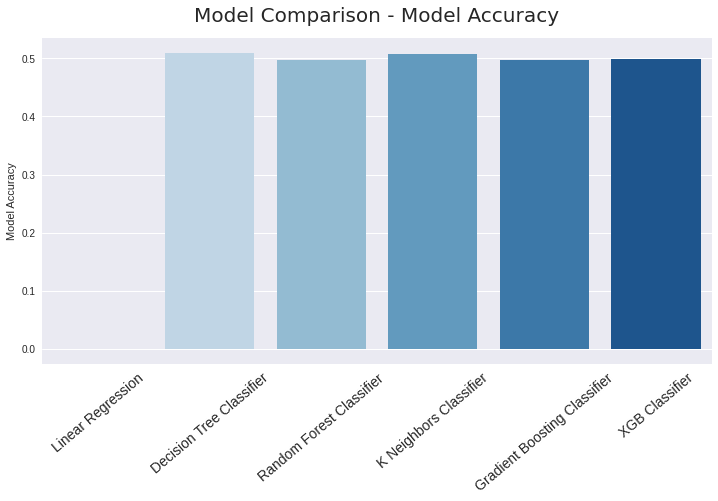

In [53]:
plt.style.use("seaborn")

x = ["Linear Regression", 
     "Decision Tree Classifier", 
     "Random Forest Classifier", 
     "K Neighbors Classifier",  
     "Gradient Boosting Classifier",
     "XGB Classifier"]

y = [LinearRegressionScore, 
     DecisionTreeClassifierScore, 
     RandomForestClassifierScore, 
     KNeighborsClassifierScore,  
     GradientBoostingClassifierScore, 
     XGBClassifierScore]

fig, ax = plt.subplots(figsize=(12,6))
sns.barplot(x=x,y=y, palette="Blues");
plt.ylabel("Model Accuracy")
plt.xticks(rotation=40, fontsize=14)
plt.title("Model Comparison - Model Accuracy", fontsize=20, fontname="Helvetica", y=1.03)
plt.show()